### Possession 비율 그래프

#### 1. 필요 라이브러리 & 데이터 불러오기

In [25]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [140]:
player_data = pd.read_csv(r"C:\krpython\adios-video\adios-video\Kyungran\testMatch-heatmap-df.csv", index_col=0)
player_data

,frame_num,player_id,team,team_color,has_ball,coord_x,coord_y,start_pitch_side,in_pa
0,0,OJY,1,"[230, 61, 37]",True,368,212,left,non_pa
1,0,SMJ,1,"[230, 61, 37]",NaN,191,354,left,non_pa
2,0,KSW,1,"[230, 61, 37]",NaN,62,204,left,left_pa
3,0,SDG,1,"[230, 61, 37]",NaN,232,31,left,non_pa
4,0,SHW,0,"[38, 110, 219]",NaN,457,204,right,non_pa
...,...,...,...,...,...,...,...,...,...
9627,1203,SMJ,1,"[230, 61, 37]",NaN,590,226,left,non_pa
9628,1203,KYS,0,"[38, 110, 219]",NaN,746,233,right,right_pa
9629,1203,OJY,1,"[230, 61, 37]",NaN,452,40,left,non_pa
9630,1203,SDG,1,"[230, 61, 37]",NaN,533,163,left,non_pa


In [141]:
player_data = player_data[player_data['has_ball'] == True]
player_data

,frame_num,player_id,team,team_color,has_ball,coord_x,coord_y,start_pitch_side,in_pa
0,0,OJY,1,"[230, 61, 37]",True,368,212,left,non_pa
8,1,OJY,1,"[230, 61, 37]",True,368,211,left,non_pa
16,2,OJY,1,"[230, 61, 37]",True,371,213,left,non_pa
24,3,OJY,1,"[230, 61, 37]",True,376,216,left,non_pa
32,4,OJY,1,"[230, 61, 37]",True,378,216,left,non_pa
...,...,...,...,...,...,...,...,...,...
9593,1199,KDW,0,"[38, 110, 219]",True,521,378,right,non_pa
9601,1200,KDW,0,"[38, 110, 219]",True,524,379,right,non_pa
9609,1201,KDW,0,"[38, 110, 219]",True,525,380,right,non_pa
9617,1202,KDW,0,"[38, 110, 219]",True,527,380,right,non_pa


#### 2. 데이터 전처리

##### 1) 팀 구분 짓기

In [142]:
# 팀 구분
team_a = player_data[player_data['start_pitch_side']=='left']
team_b = player_data[player_data['start_pitch_side']=='right']
team_a

,frame_num,player_id,team,team_color,has_ball,coord_x,coord_y,start_pitch_side,in_pa
0,0,OJY,1,"[230, 61, 37]",True,368,212,left,non_pa
8,1,OJY,1,"[230, 61, 37]",True,368,211,left,non_pa
16,2,OJY,1,"[230, 61, 37]",True,371,213,left,non_pa
24,3,OJY,1,"[230, 61, 37]",True,376,216,left,non_pa
32,4,OJY,1,"[230, 61, 37]",True,378,216,left,non_pa
...,...,...,...,...,...,...,...,...,...
9117,1139,OJY,1,"[230, 61, 37]",True,575,28,left,non_pa
9125,1140,OJY,1,"[230, 61, 37]",True,575,27,left,non_pa
9289,1161,SDG,1,"[230, 61, 37]",True,654,64,left,non_pa
9313,1164,SDG,1,"[230, 61, 37]",True,662,66,left,non_pa


##### 2) 영역 지정

In [144]:
#가로 기준
categories = ['Left Side', 'Middle', 'Right Side']

team_a['region_y'] = pd.cut(team_a['coord_y'], bins=[0, 140, 280, 420], labels=categories, ordered=True)
team_b['region_y'] = pd.cut(team_b['coord_y'], bins=[0, 140, 280, 420], labels=categories[::-1], ordered=True)

team_a_y = team_a['region_y'].value_counts(normalize=True).reindex(categories) * 100
team_b_y = team_b['region_y'].value_counts(normalize=True).reindex(categories[::-1])* 100

print(team_a_y)
print('---')
print(team_b_y)

region_y
Left Side     35.426009
Middle        42.376682
Right Side    22.197309
Name: proportion, dtype: float64
---
region_y
Right Side    19.553073
Middle        40.782123
Left Side     39.664804
Name: proportion, dtype: float64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_17144\55581965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_a['region_y'] = pd.cut(team_a['coord_y'], bins=[0, 140, 280, 420], labels=categories, ordered=True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17144\55581965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_b['region_y'] = pd.cut(team_b['coord_y'], bins=[0, 140, 280, 420], labels=categories[::-1], ordered=True)


In [146]:
# 세로 기준
categories_h = ['Home Third', 'Middle', 'Away Third']
team_a['region_x'] = pd.cut(team_a['coord_x'], bins=[0, 270, 540, 810], labels=categories_h, ordered=True)

team_b['region_x'] = pd.cut(team_b['coord_x'], bins=[0, 270, 540, 810], labels=categories_h[::-1], ordered=True)

team_a_x = team_a['region_x'].value_counts(normalize=True).reindex(categories_h)*100 
team_b_x = team_b['region_x'].value_counts(normalize=True).reindex(categories_h[::-1])*100 

print(team_a_x)
print('---')
print(team_b_x)

region_x
Home Third    39.910314
Middle        42.600897
Away Third    17.488789
Name: proportion, dtype: float64
---
region_x
Away Third    18.435754
Middle        28.491620
Home Third    53.072626
Name: proportion, dtype: float64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_17144\17548405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_a['region_x'] = pd.cut(team_a['coord_x'], bins=[0, 270, 540, 810], labels=categories_h, ordered=True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17144\17548405.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_b['region_x'] = pd.cut(team_b['coord_x'], bins=[0, 270, 540, 810], labels=categories_h[::-1], ordered=True)


In [149]:
team_a = pd.DataFrame({
        'Y_Proportion': team_a_y.values,
        'X_Proportion': team_a_x.values
    })

team_b = pd.DataFrame({
        'Y_Proportion': team_b_y.values,
        'X_Proportion': team_b_x.values
    })

team_a

,Y_Proportion,X_Proportion
0,35.426009,39.910314
1,42.376682,42.600897
2,22.197309,17.488789


In [150]:
team_b

,Y_Proportion,X_Proportion
0,19.553073,18.435754
1,40.782123,28.491620
2,39.664804,53.072626


### 3. 시각화

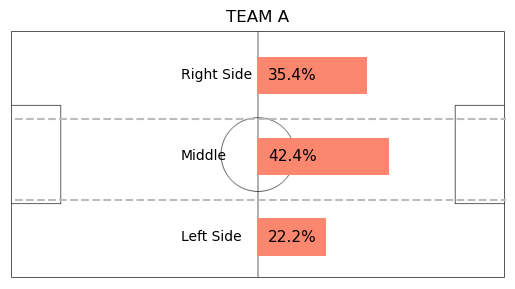

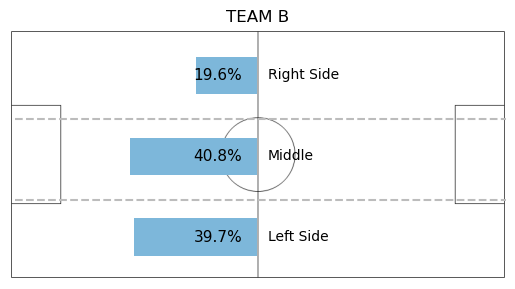

In [171]:
def plot_team(team_data, team_name, color):
    nuri_pitch=plt.imread(r"C:\krpython\adios-video\adios-video\Kyungran\nuri_pitch.png")

    fig, ax = plt.subplots()

    # 막대 너비 및 최대 길이 설정
    bar_height = 60
    max_length = 500
    bar_spacing = 130

    labels = ['Left Side', 'Middle', 'Right Side']

    # Y_Proportion 값만 사용
    y_proportions = team_data['Y_Proportion']
    swapped_distribution = y_proportions[::-1]  # Right Side와 Left Side 위치 바꾸기

    # 막대 그래프 그리기
    for idx, value in enumerate(swapped_distribution):
        y_start = 70 + (idx * bar_spacing)
        length = (value / 100) * max_length
        if team_name == 'A':
            ax.barh(y_start, length, height=bar_height, left=402, color=color)
            ax.text(280, y_start, labels[idx], va='center', fontsize=10)
            ax.text(420, y_start, f'{value:.1f}%', va='center', fontsize=11)
        else:
            ax.barh(y_start, -length, height=bar_height, left=402, color=color)
            ax.text(420, y_start, labels[idx], va='center', fontsize=10)
            ax.text(300, y_start, f'{value:.1f}%', va='center', fontsize=11)
        
        if idx < len(swapped_distribution) - 1:
            ax.axhline(y=y_start + 60, xmin=0.01, xmax=5, color='#BCBCBC', linestyle='--')

    ax.set_title(f'TEAM {team_name}', fontsize=12)
    ax.imshow(nuri_pitch, extent=[5, 802.5, 2.5, 402.5])
    ax.axis('off')
    plt.show()

# 팀 A 시각화
plot_team(team_a, 'A', '#FB876E')

# 팀 B 시각화
plot_team(team_b, 'B', '#7DB7DA')


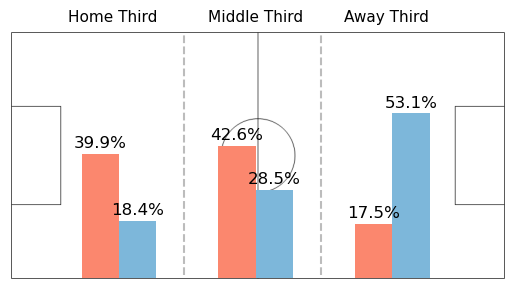

In [135]:
nuri_pitch=plt.imread(r"C:\krpython\adios-video\adios-video\Kyungran\nuri_pitch.png")
fig, ax = plt.subplots()

# 막대 너비 및 최대 길이 설정
bar_width = 60
max_length = 500  # 막대 최대 길이 설정
bar_spacing = 220  
base_line = 180  # 기준선 설정 (축구장의 하단에 맞추기 위해 Y 좌표를 사용)

# 팀 A 막대 그래프 그리기
for idx, (region, value) in enumerate(team_a_x.items()):
    if value > 0 or region in ['Deffensive', 'Offensive Side', 'Middle']:
        x_start = base_line + (idx * bar_spacing)  # 막대 시작 위치 x 좌표
        length = (value / 100) * max_length  # 막대 길이 설정
        ax.bar(x_start - bar_width, length, width=bar_width, bottom=5, color='#FB876E', align='edge')  # 막대 그리기
        ax.text(x_start - bar_width / 2, length + 10, f'{value:.1f}%',  ha='center', va='bottom', fontsize=12,  )  # 비율 텍스트
        if idx < len(team_a_distribution_x) -1:
            ax.axvline(x=x_start + bar_width + 45, color='#BCBCBC', linestyle='--', ymin=0.02, ymax=0.99)


# 팀 B 막대 그래프 그리기
for idx, (region, value) in enumerate(team_b_x.items()):
    if value > 0:
        x_start = base_line + (idx * bar_spacing)  # 막대 시작 위치 x 좌표
        length = (value / 100) * max_length  # 막대 길이 설정
        ax.bar(x_start, length, width=bar_width, bottom=5, color='#7DB7DA', align='edge')  # 막대 그리기
        ax.text(x_start + bar_width / 2, length + 10, f'{value:.1f}%', ha='center', va='bottom', fontsize=12)  # 비율 텍스트

# 활동 구역 텍스트 추가
ax.text(170, 425, "Home Third", ha='center', va='center', fontsize=11)
ax.text(400, 425, "Middle Third", ha='center', va='center', fontsize=11)
ax.text(610, 425, "Away Third", ha='center', va='center', fontsize=11)

ax.imshow(nuri_pitch, extent = [5, 802.5, 2.5, 402.5])
ax.axis('off')
plt.show()